In [17]:
import numpy as np
import glob
import matplotlib.pyplot as plt

def power_law(x,alpha,beta):
    return alpha*x**beta

In [35]:
r1a, r1b = 1150,1170
r2a, r2b = 1275,1290
r3a, r3b = 1350,1360
r4a, r4b = 1445,1465
r5a, r5b = 1690,1705
r6a, r6b = 1770,1810
r7a, r7b = 1970,2400
r8a, r8b = 2480,2675
r9a, r9b = 2925,3400

As = [r2a,r3a,r4a,r5a,r6a,r7a,r8a]
Bs = [r2b,r3b,r4b,r5b,r6b,r7b,r8b]

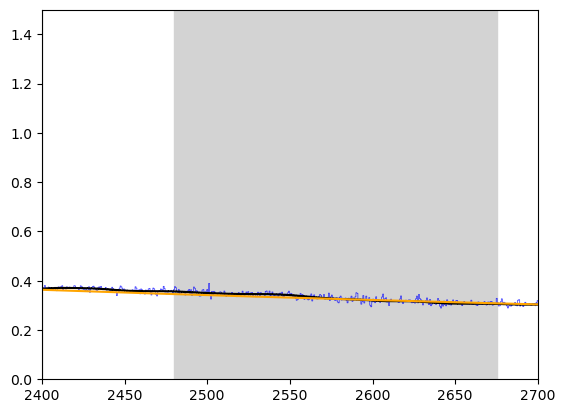

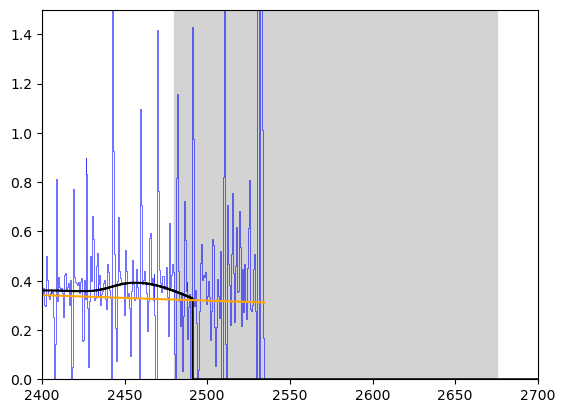

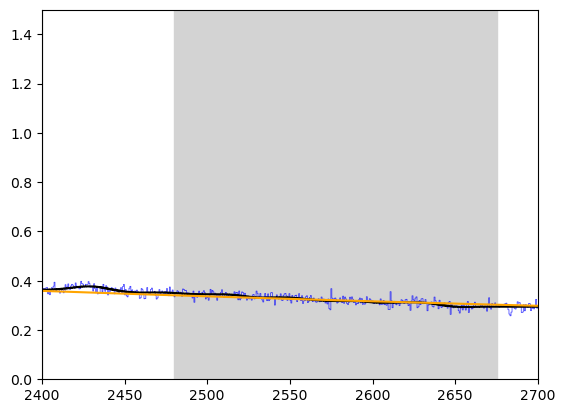

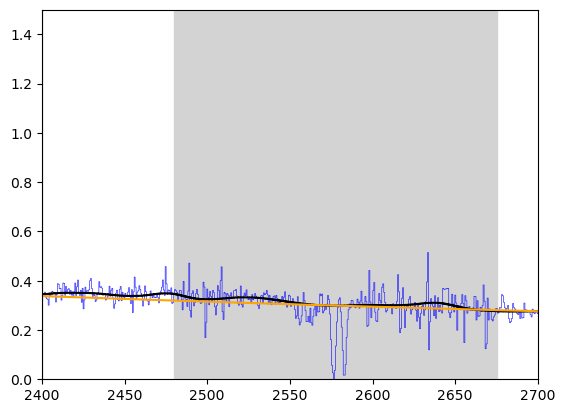

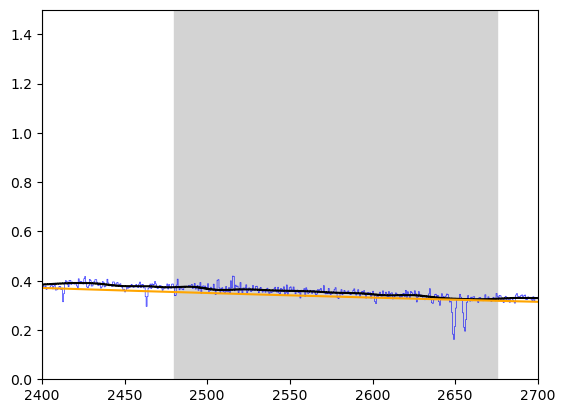

In [64]:
pl_lz = np.loadtxt('/media/bartosz/USB STICK/BOSS_DR14_ext/power_law_fits.txt', dtype='str')
pl_idx = [int(i) for i in pl_lz[:,0]]
pl_alpha = [float(a) for a in pl_lz[:,2]]
pl_beta = [float(b) for b in pl_lz[:,4]]

qso = 'J1335-0328'
nn_hz = np.loadtxt('/media/bartosz/USB STICK/highz_data/highZ_NN_ext.txt', dtype='str')
nn_names = nn_hz[:,0]
qso_idx = np.where(nn_names == qso)[0][0]
nn_idxs = [int(n) for n in nn_hz[:,1:6][qso_idx]]
nn_idxs

alphas = [pl_alpha[pl_idx.index(ni)] for ni in nn_idxs]
betas = [pl_beta[pl_idx.index(ni)] for ni in nn_idxs]

meta_lz = np.loadtxt('/media/bartosz/USB STICK/BOSS_DR14_ext/meta_data_ext_combined.txt', dtype='str')
meta_idx = [int(i) for i in meta_lz[:,0]]
meta_z = [float(z) for z in meta_lz[:,1]]

nn_z = [float(meta_z[meta_idx.index(ni)]) for ni in nn_idxs]


spec_hz = np.loadtxt('/media/bartosz/USB STICK/highz_data/normed/{}_norm.txt'.format(qso))
wl_hz = spec_hz[:,0]
flux_hz = spec_hz[:,1]

for i in range(len(alphas)):
    z = nn_z[i]
    if z<2:
        sf = 'spectra_07_2/'
    elif 2<z<3:
        sf = 'spectra_2_3/'
    elif z>3:
        sf = 'spectra_3_4/'
        
    spec = np.loadtxt(glob.glob('/media/bartosz/USB STICK/BOSS_DR14_ext/'+sf+'normed/{}_*.txt'.format(nn_idxs[i]))[0])
    wl = spec[:,0]#/(1+z)
    flux = spec[:,1]
    fit = np.loadtxt(glob.glob('/media/bartosz/USB STICK/BOSS_DR14_ext/'+sf+'fits/{}_*.txt'.format(nn_idxs[i]))[0])
    wl_fit = fit[:,0]
    flux_fit = fit[:,1]
    fig = plt.figure()
    #plt.plot(wl_hz,flux_hz,color='red',drawstyle='steps-mid',linewidth=0.5,alpha=0.6)
    plt.plot(wl,flux,color='blue',drawstyle='steps-mid',linewidth=0.5,alpha=0.8)
    plt.plot(wl_fit,flux_fit,drawstyle='steps-mid',color='black')
    plt.plot(wl,power_law(wl,alphas[i],betas[i]),color='orange')
    for j in range(len(As)):
        plt.axvspan(As[j],Bs[j],color='lightgrey')
    plt.xlim(2400,2700)
    plt.ylim(0,1.5)
    plt.show
